In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import interp1d
from scipy.integrate import quad

from GaussianCovariance import *

In [2]:
# Read the input power spectrum
k_array, pk_array = np.genfromtxt("pk_0p9.dat", unpack=True)

# Interpolate the power spectrum
interp_pk = interp1d(k_array, pk_array, kind="cubic", fill_value="extrapolate")

In [3]:
sigma_v_2 = quad( lambda x : interp_pk(np.exp(x)) * np.exp(x), np.log(1.e-4), np.log(10))[0] / (6 * np.pi**2)

/var/folders/77/7qz12km53wl_cvghf05bzl_c0000gp/T/ipykernel_16100/4215122843.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  sigma_v_2 = quad( lambda x : interp_pk(np.exp(x)) * np.exp(x), np.log(1.e-4), np.log(10))[0] / (6 * np.pi**2)


In [4]:
sigma_v_2

14.128061013664173

In [5]:
rad_edges = np.linspace(0, 200, 41)
r_bins = (rad_edges[:-1] + rad_edges[1:] ) * 0.5
n_bins_r = len(r_bins)
l_list = [0, 2, 4]
n_data_points = n_bins_r * len(l_list)

In [6]:
input_cov = np.genfromtxt("cov_xi_0p9.dat", usecols=(2))
input_cov = np.reshape(input_cov, newshape=(n_data_points, n_data_points))
input_std = np.sqrt(np.diagonal(input_cov))
input_corr = input_cov / np.outer(input_std, input_std)

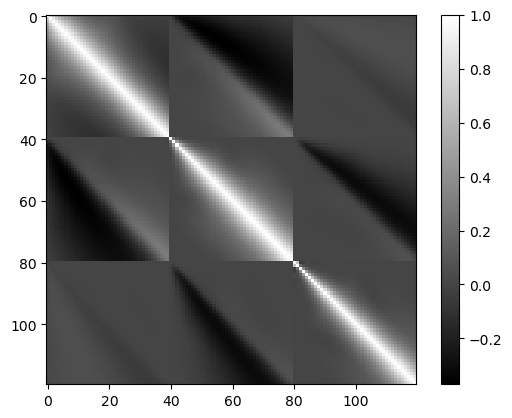

In [7]:
cb = plt.imshow(input_corr, cmap=plt.cm.binary_r)
plt.colorbar(cb)

In [8]:
# Set the survey parameters
volume = 3780**3
n_particles = 110321755
number_density = n_particles/volume
number_density

0.002042611452009985

In [9]:
# Set the clustering model
b1 = 1.3679
f = 0.865
beta = f/b1

p_k_mu = lambda k, mu : (b1 + f * mu**2) **2 * interp_pk(k) / (1 + mu**2 * k**2 * f**2 * sigma_v_2)

In [10]:
xi_covariance = TwoPointGaussianCovariance(rad_edges, l_list, deg=51, deg_k=10)

1025
Computing Bessels functions...
Done!


In [11]:
cov = xi_covariance(p_k_mu, volume, number_density)

Computing tabulated sigma squared...
Done!


In [12]:
std = np.sqrt(np.diagonal(cov))
corr = cov / np.outer(std, std)

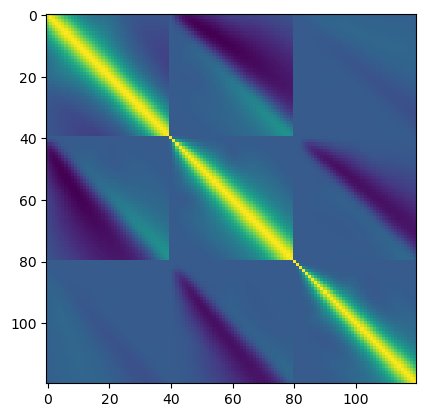

In [13]:
plt.imshow(corr)

In [15]:
plt.semilogy(r_bins, input_std[0:n_bins_r])
plt.semilogy(r_bins, std[0:n_bins_r])

In [16]:
plt.semilogy(r_bins, input_std[n_bins_r:2*n_bins_r])
plt.semilogy(r_bins, std[n_bins_r:2*n_bins_r])

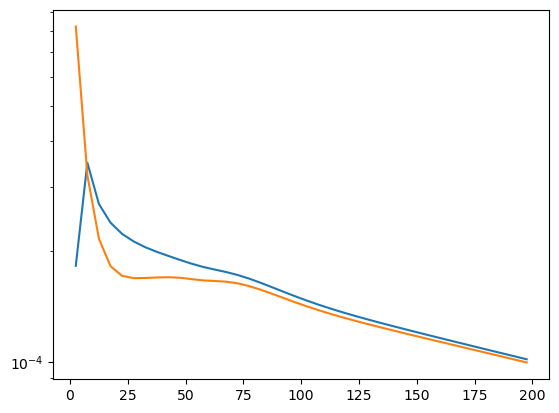

In [17]:
plt.semilogy(r_bins, input_std[2*n_bins_r:])
plt.semilogy(r_bins, std[2*n_bins_r:])